## Importing Librariries and Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import warnings
from sklearn.metrics import silhouette_score, silhouette_samples


In [2]:
df = pd.read_csv('C:/Users/Rupesh/Downloads/archive (23)/CC GENERAL.csv')
df.head(5) 

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


## Data Exploration

In [3]:
# Checking for Shape
df.shape

(8950, 18)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [5]:
# Checking for null values
df.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

### Add column mean to numerical columns 

In [6]:
# Find all numerical columns
numerical_columns = df.select_dtypes(include='number').columns

# Replace null values with mean for all numerical columns
for column in numerical_columns:
    mean_value = df[column].mean()
    df[column].fillna(mean_value, inplace=True)


In [7]:
# Statistical Summary
df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.612411,2895.063757,2330.588021,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,170.857654,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,335.628312,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,864.206542,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [8]:
# Dropping insignificant Column
df = df.drop(columns='CUST_ID')

## Heatmap

<AxesSubplot:>

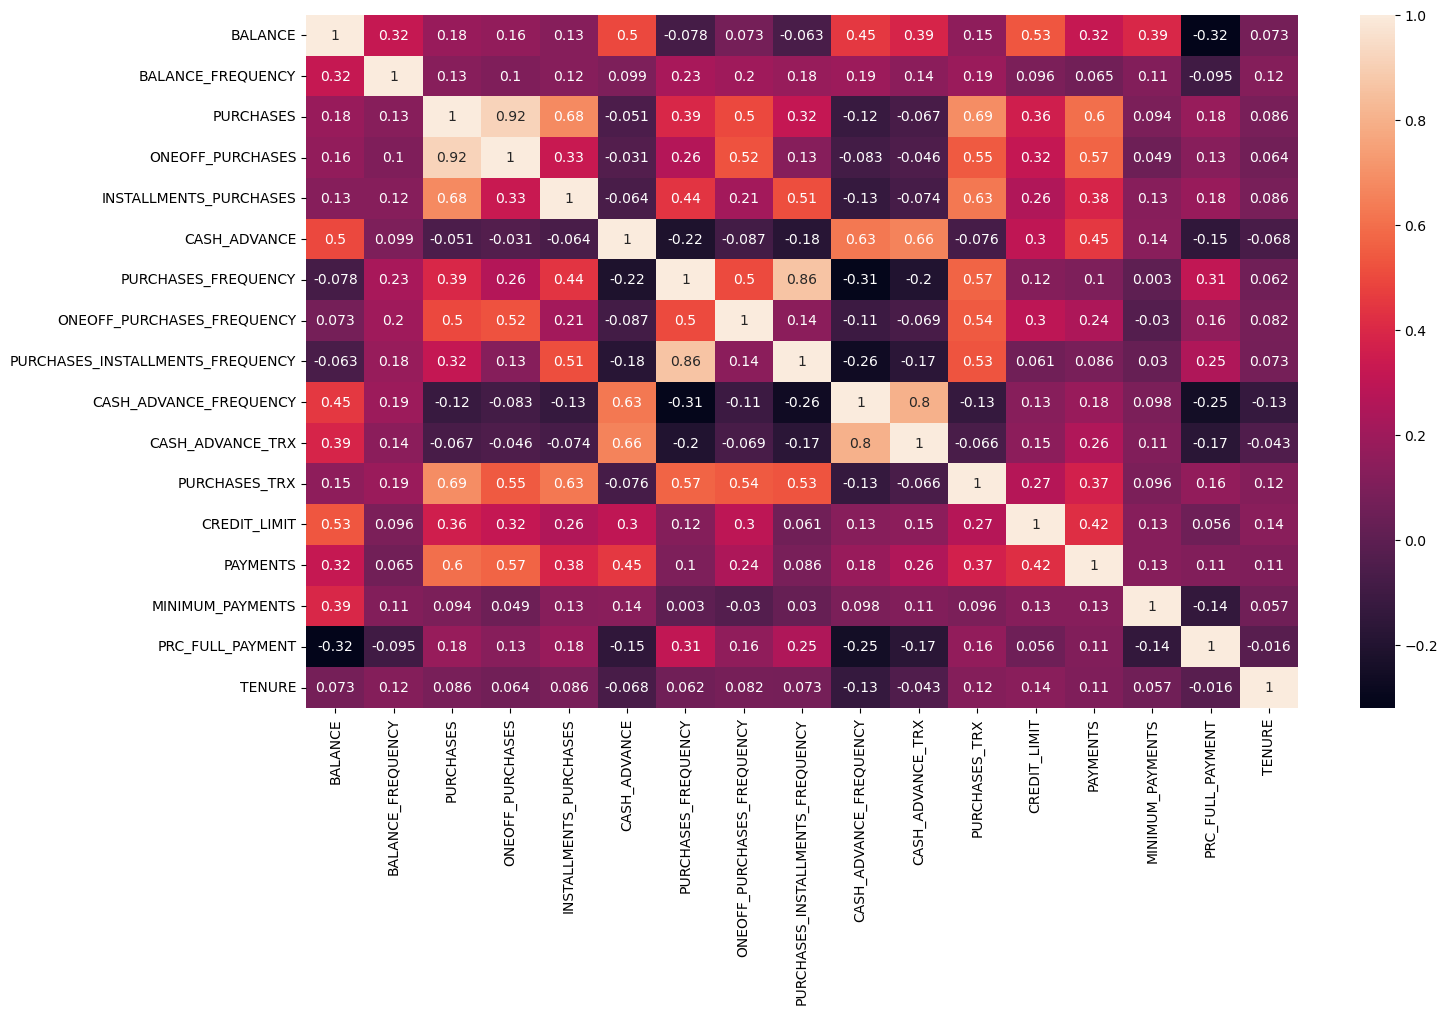

In [9]:
# heatmap
corr = df.corr()
plt.figure(figsize=(16,9))
sns.heatmap(corr,annot=True)

## Splitting the dataset (only indepndent variable,no target variable)


## Feature Scaling

In [10]:
sc = StandardScaler()
df = sc.fit_transform(df)

## Elbow method (finding the optimal number of clusters) 

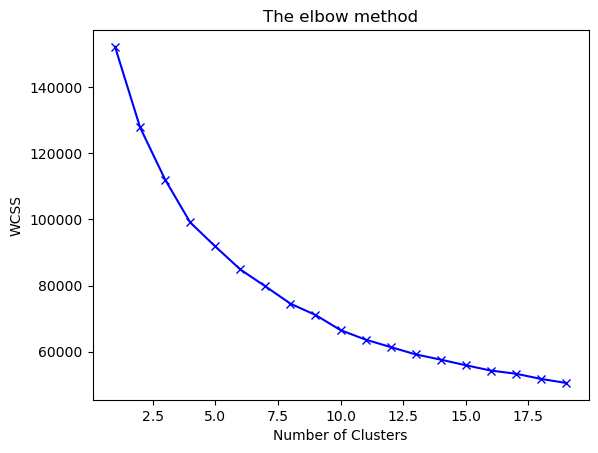

In [11]:
# Filter out FutureWarnings
warnings.filterwarnings("ignore", category=FutureWarning, module="sklearn")
wcss = []
for i in range(1,20):
    kmeans = KMeans(n_clusters=i,init='k-means++')
    kmeans.fit(df)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,20),wcss,'bx-')
plt.title('The elbow method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()
    

* The optimal number of clusters is 3

## Buildiing the model

In [12]:
kmeans = KMeans(n_clusters=3,init='k-means++',random_state=0)

In [13]:
# dependent variable
y_kmeans = kmeans.fit_predict(df)

In [14]:
y_kmeans.shape

(8950,)

In [15]:
y_kmeans = y_kmeans.reshape(len(y_kmeans),1)

In [16]:
y_kmeans.shape

(8950, 1)

In [17]:
b = np.concatenate((y_kmeans,df),axis=1)

## Cluster Table in Standardised Form

In [18]:
df_final = pd.DataFrame(data=b,columns=['Cluster_Number',
    
    'BALANCE',
    'BALANCE_FREQUENCY',
    'PURCHASES',
    'ONEOFF_PURCHASES',
    'INSTALLMENTS_PURCHASES',
    'CASH_ADVANCE',
    'PURCHASES_FREQUENCY',
    'ONEOFF_PURCHASES_FREQUENCY',
    'PURCHASES_INSTALLMENTS_FREQUENCY',
    'CASH_ADVANCE_FREQUENCY',
    'CASH_ADVANCE_TRX',
    'PURCHASES_TRX',
    'CREDIT_LIMIT',
    'PAYMENTS',
    'MINIMUM_PAYMENTS',
    'PRC_FULL_PAYMENT',
    'TENURE'
]
)

In [19]:
df_final.head(5)

,Cluster_Number,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,1.0,-0.731989,-0.249434,-0.424900,-0.356934,-0.349079,-0.466786,-0.806490,-0.678661,-0.707313,-0.675349,-0.476070,-0.511333,-0.960433,-0.528979,-3.109675e-01,-0.525551,0.36068
1,2.0,0.786961,0.134325,-0.469552,-0.356934,-0.454576,2.605605,-1.221758,-0.678661,-0.916995,0.573963,0.110074,-0.591796,0.688639,0.818642,8.931021e-02,0.234227,0.36068
2,1.0,0.447135,0.518084,-0.107668,0.108889,-0.454576,-0.466786,1.269843,2.673451,-0.916995,-0.675349,-0.476070,-0.109020,0.826062,-0.383805,-1.016632e-01,-0.525551,0.36068
3,1.0,0.049099,-1.016953,0.232058,0.546189,-0.454576,-0.368653,-1.014125,-0.399319,-0.916995,-0.258913,-0.329534,-0.551565,0.826062,-0.598688,-4.390474e-16,-0.525551,0.36068
4,1.0,-0.358775,0.518084,-0.462063,-0.347294,-0.454576,-0.466786,-1.014125,-0.399319,-0.916995,-0.675349,-0.476070,-0.551565,-0.905464,-0.364368,-2.657913e-01,-0.525551,0.36068


## Clustering Table in Normal Form

In [20]:
column_names = [
    
    'BALANCE',
    'BALANCE_FREQUENCY',
    'PURCHASES',
    'ONEOFF_PURCHASES',
    'INSTALLMENTS_PURCHASES',
    'CASH_ADVANCE',
    'PURCHASES_FREQUENCY',
    'ONEOFF_PURCHASES_FREQUENCY',
    'PURCHASES_INSTALLMENTS_FREQUENCY',
    'CASH_ADVANCE_FREQUENCY',
    'CASH_ADVANCE_TRX',
    'PURCHASES_TRX',
    'CREDIT_LIMIT',
    'PAYMENTS',
    'MINIMUM_PAYMENTS',
    'PRC_FULL_PAYMENT',
    'TENURE'
]







In [23]:
# Inverse transform the standardized data
df_final_original_scale = sc.inverse_transform(df)
# Create a DataFrame with the original column names (excluding 'CUST_ID')
df_final_original_scale = pd.DataFrame(data=df_final_original_scale,columns=column_names)
# Add the 'Cluster_Number' column from the clustered results
df_final_original_scale['Cluster_Number'] = df_final['Cluster_Number']
#Display the final DataFrame with the original scale and column names
df_final_original_scale.head()
df_final_original_scale.to_csv('table.csv',index=False)






